In [106]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore # Outliers
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [107]:
# Read in the csv file and convert to a Pandas dataframe
df_2015 = pd.read_csv('data/2015.csv')
df_2016 = pd.read_csv('data/2016.csv')
df_2017 = pd.read_csv('data/2017.csv')
df_2018 = pd.read_csv('data/2018.csv')
df_2019 = pd.read_csv('data/2019.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [108]:
print('data 2015:', df_2015.shape)
print('data 2016:', df_2016.shape)
print('data 2017:', df_2017.shape)
print('data 2018:', df_2018.shape)
print('data 2019:', df_2019.shape)

data 2015: (158, 12)
data 2016: (157, 13)
data 2017: (155, 12)
data 2018: (156, 9)
data 2019: (156, 9)


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [109]:
print('data 2015:', df_2015.info())
df_2015.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [110]:
print('data 2016:', df_2016.info())
df_2016.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [111]:
print('data 2017:', df_2017.info())
df_2017.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [112]:
print('data 2018:', df_2018.info())
df_2018.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
data 2018: None


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [113]:
print('data 2019:', df_2019.info())
df_2019.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
data 2019: None


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [114]:
# check for countries or regions that are not in the dataset
# We can see that most of the variables are as good as it should be
print('Number of NAN values in 2015: ', df_2015.isna().sum().sum())
print('Number of NAN values in 2016: ', df_2016.isna().sum().sum())
print('Number of NAN values in 2017: ', df_2017.isna().sum().sum())
print('Number of NAN values in 2018: ', df_2018.isna().sum().sum())
print('Number of NAN values in 2019: ', df_2019.isna().sum().sum())

# 2018 has one column with a NAN value
print('Columns with NAN values in 2018: ', df_2018.columns[df_2018.isna().any()].tolist())
df_2018[df_2018.isna().any(axis=1)]

Number of NAN values in 2015:  0
Number of NAN values in 2016:  0
Number of NAN values in 2017:  0
Number of NAN values in 2018:  1
Number of NAN values in 2019:  0
Columns with NAN values in 2018:  ['Perceptions of corruption']


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [115]:
#  print happeness scores for all dataframes
print('2015: range of happenes (', df_2015['Happiness Score'].max(),' , ', df_2015['Happiness Score'].min(),')')
print('2016: range of happenes (', df_2016['Happiness Score'].max(),' , ', df_2016['Happiness Score'].min(),')')
print('2017: range of happenes (', df_2017['Happiness.Score'].max(),' , ', df_2017['Happiness.Score'].min(),')')
print('2018: range of happenes (', df_2018['Score'].max(),' , ', df_2018['Score'].min(),')')
print('2019: range of happenes (', df_2019['Score'].max(),' , ', df_2019['Score'].min(),')')

2015: range of happenes ( 7.587  ,  2.839 )
2016: range of happenes ( 7.526  ,  2.905 )
2017: range of happenes ( 7.53700017929077  ,  2.69300007820129 )
2018: range of happenes ( 7.632  ,  2.905 )
2019: range of happenes ( 7.769  ,  2.853 )


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [116]:
# check for columns that are not relevant
print('2015: ', df_2015.columns)
print('2016: ', df_2016.columns)
print('2017: ', df_2017.columns)
print('2018: ', df_2018.columns)
print('2019: ', df_2019.columns)

2015:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016:  Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017:  Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018:  Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy l

In [117]:
df_2015_new = df_2015.drop(['Standard Error', 'Economy (GDP per Capita)','Generosity'], axis=1)
df_2016_new = df_2016.drop(['Economy (GDP per Capita)','Generosity'], axis=1)
df_2017_new = df_2017.drop(['Whisker.high','Whisker.low','Economy..GDP.per.Capita.','Generosity'], axis=1)
df_2018_new = df_2018.drop(['GDP per capita','Generosity'], axis=1)
df_2019_new = df_2019.drop(['GDP per capita','Generosity'], axis=1)

In [118]:
print('data 2015 new:', df_2015_new.info())
df_2015_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB
data 2015 new: None


,Happiness Rank,Happiness Score,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.991046,0.630259,0.428615,0.143422,2.098977
std,45.754363,1.145010,0.272369,0.247078,0.150693,0.120034,0.553550
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.856823,0.439185,0.328330,0.061675,1.759410
50%,79.500000,5.232500,1.029510,0.696705,0.435515,0.107220,2.095415
75%,118.750000,6.243750,1.214405,0.811013,0.549092,0.180255,2.462415
max,158.000000,7.587000,1.402230,1.025250,0.669730,0.551910,3.602140


In [119]:
print('data 2016:', df_2016_new.info())
df_2016_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Family                         157 non-null    float64
 7   Health (Life Expectancy)       157 non-null    float64
 8   Freedom                        157 non-null    float64
 9   Trust (Government Corruption)  157 non-null    float64
 10  Dystopia Residual              157 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 13.6+ KB
data 2016: None


,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.793621,0.557619,0.370994,0.137624,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.266706,0.229349,0.145507,0.111038,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.641840,0.382910,0.257480,0.061260,2.031710
50%,79.000000,5.314000,5.237000,5.419000,0.841420,0.596590,0.397470,0.105470,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.021520,0.729930,0.484530,0.175540,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.183260,0.952770,0.608480,0.505210,3.837720


In [120]:
print('data 2017:', df_2017_new.info())
df_2017_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Family                         155 non-null    float64
 4   Health..Life.Expectancy.       155 non-null    float64
 5   Freedom                        155 non-null    float64
 6   Trust..Government.Corruption.  155 non-null    float64
 7   Dystopia.Residual              155 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 9.8+ KB
data 2017: None


,Happiness.Rank,Happiness.Score,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,1.188898,0.551341,0.408786,0.123120,1.850238
std,44.888751,1.131230,0.287263,0.237073,0.149997,0.101661,0.500028
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,1.042635,0.369866,0.303677,0.057271,1.591291
50%,78.000000,5.279000,1.253918,0.606042,0.437454,0.089848,1.832910
75%,116.500000,6.101500,1.414316,0.723008,0.516561,0.153296,2.144654
max,155.000000,7.537000,1.610574,0.949492,0.658249,0.464308,3.117485


In [121]:
print('data 2018:', df_2018_new.info())
df_2018_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Perceptions of corruption     155 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.7+ KB
data 2018: None


,Overall rank,Score,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,1.213237,0.597346,0.454506,0.112000
std,45.177428,1.119506,0.302372,0.247579,0.162424,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,1.066750,0.422250,0.356000,0.051000
50%,78.500000,5.378000,1.255000,0.644000,0.487000,0.082000
75%,117.250000,6.168500,1.463000,0.777250,0.578500,0.137000
max,156.000000,7.632000,1.644000,1.030000,0.724000,0.457000


In [122]:
print('data 2019:', df_2019_new.info())
df_2019_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Perceptions of corruption     156 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.7+ KB
data 2019: None


,Overall rank,Score,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,1.208814,0.725244,0.392571,0.110603
std,45.177428,1.113120,0.299191,0.242124,0.143289,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,1.055750,0.547750,0.308000,0.047000
50%,78.500000,5.379500,1.271500,0.789000,0.417000,0.085500
75%,117.250000,6.184500,1.452500,0.881750,0.507250,0.141250
max,156.000000,7.769000,1.624000,1.141000,0.631000,0.453000


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [123]:
# check for unique values
print('Number of unique values in 2015: ', df_2015_new.nunique())
print('Number of unique values in 2016: ', df_2016_new.nunique())
print('Number of unique values in 2017: ', df_2017_new.nunique())
print('Number of unique values in 2018: ', df_2018_new.nunique())
print('Number of unique values in 2019: ', df_2019_new.nunique())

Number of unique values in 2015:  Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Dystopia Residual                158
dtype: int64
Number of unique values in 2016:  Country                          157
Region                            10
Happiness Rank                   154
Happiness Score                  154
Lower Confidence Interval        154
Upper Confidence Interval        154
Family                           157
Health (Life Expectancy)         156
Freedom                          157
Trust (Government Corruption)    156
Dystopia Residual                157
dtype: int64
Number of unique values in 2017:  Country                          155
Happiness.Rank                   155
Happiness.Score                  151
Family               

In [124]:
# check for duplicates
print('Number of duplicates in 2015: ', df_2015_new.duplicated().sum())
print('Number of duplicates in 2016: ', df_2016_new.duplicated().sum())
print('Number of duplicates in 2017: ', df_2017_new.duplicated().sum())
print('Number of duplicates in 2018: ', df_2018_new.duplicated().sum())
print('Number of duplicates in 2019: ', df_2019_new.duplicated().sum())

Number of duplicates in 2015:  0
Number of duplicates in 2016:  0
Number of duplicates in 2017:  0
Number of duplicates in 2018:  0
Number of duplicates in 2019:  0


#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [125]:
# check for null values
# نحسب عدد القيم الناقصة في كل داتا
print('Number of NAN values in 2015 before deletion: ', df_2015_new.isna().sum().sum())
print('Number of NAN values in 2016 before deletion: ', df_2016_new.isna().sum().sum())
print('Number of NAN values in 2017 before deletion: ', df_2017_new.isna().sum().sum())
print('Number of NAN values in 2018 before deletion: ', df_2018_new.isna().sum().sum())
print('Number of NAN values in 2019 before deletion: ', df_2019_new.isna().sum().sum())

# نحذف الصفوف الناقصه
df_2015_new  =  df_2015_new.dropna()
df_2016_new  =  df_2016_new.dropna()
df_2017_new  =  df_2017_new.dropna()
df_2018_new  =  df_2018_new.dropna()
df_2019_new  =  df_2019_new.dropna()

# نطبع عدد القيم الناقصة بعد الحذف
print('Number of NAN values in 2015 after deletion: ', df_2015_new.isna().sum().sum())
print('Number of NAN values in 2016 after deletion: ', df_2016_new.isna().sum().sum())
print('Number of NAN values in 2017 after deletion: ', df_2017_new.isna().sum().sum())
print('Number of NAN values in 2018 after deletion: ', df_2018_new.isna().sum().sum())
print('Number of NAN values in 2019 after deletion: ', df_2019_new.isna().sum().sum())

Number of NAN values in 2015 before deletion:  0
Number of NAN values in 2016 before deletion:  0
Number of NAN values in 2017 before deletion:  0
Number of NAN values in 2018 before deletion:  1
Number of NAN values in 2019 before deletion:  0
Number of NAN values in 2015 after deletion:  0
Number of NAN values in 2016 after deletion:  0
Number of NAN values in 2017 after deletion:  0
Number of NAN values in 2018 after deletion:  0
Number of NAN values in 2019 after deletion:  0


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [126]:
# check columns types 
print('2015: ', df_2015_new.dtypes)
print('2016: ', df_2016_new.dtypes)
print('2017: ', df_2017_new.dtypes)
print('2018: ', df_2018_new.dtypes)
print('2019: ', df_2019_new.dtypes)

2015:  Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
dtype: object
2016:  Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
dtype: object
2017:  Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Family  

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


<Axes: >

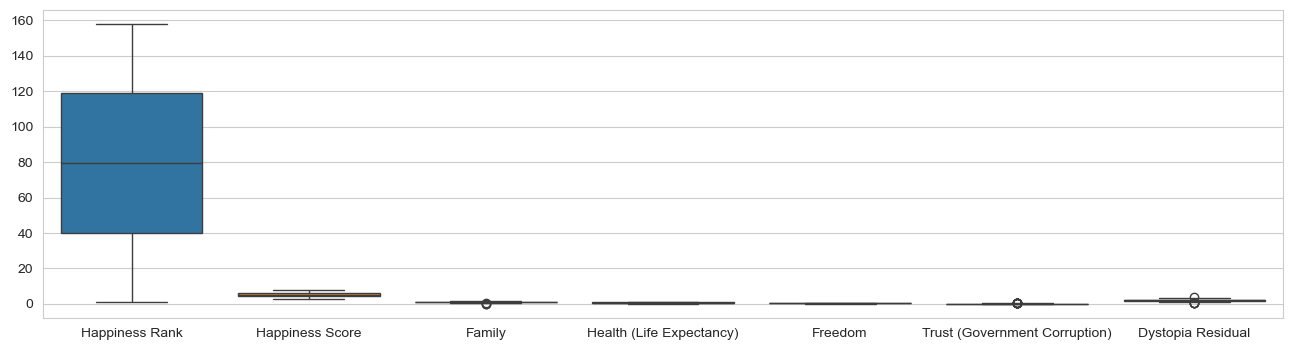

In [127]:
plt.figure(figsize=(16, 4)) # figure size, size of the drawing area
sns.boxplot(df_2015_new)

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [128]:
print("2015:\n" ,df_2015_new.isna().sum().sort_values(ascending=False))
print("2016:\n" ,df_2016_new.isna().sum().sort_values(ascending=False))
print("2017:\n" ,df_2017_new.isna().sum().sort_values(ascending=False))
print("2018:\n" ,df_2018_new.isna().sum().sort_values(ascending=False))
print("2019:\n" ,df_2019_new.isna().sum().sort_values(ascending=False))

2015:
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Dystopia Residual                0
dtype: int64
2016:
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Dystopia Residual                0
dtype: int64
2017:
 Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Trust..Government.Corruption.    0
Dystopia

### Correcting errors

-------------------

In [129]:
# merged_df = pd.concat([df_2015_new, df_2016_new, df_2017_new, df_2018_new, df_2019_new], ignore_index=True)
# merged_df.head(5)

In [130]:
# merged_df.dtypes

In [131]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [132]:
# تحذف الاوتليرز وترجع لنا الداتا الجديدة بدون اوتليرز
def quantile_based_outlier(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[
        (df[feature] >= lower_bound) & (df[feature] <= upper_bound)
    ]
    return filtered_df

In [133]:
# Why happiness score?
# عشان يهمنا نعرف الدول اللي معدل السعادة فيها عالي او منخفض
df_2015_new = quantile_based_outlier(df_2015_new, 'Happiness Score')
df_2016_new = quantile_based_outlier(df_2016_new, 'Happiness Score')
df_2017_new = quantile_based_outlier(df_2017_new, 'Happiness.Score')
df_2018_new = quantile_based_outlier(df_2018_new, 'Score')
df_2019_new = quantile_based_outlier(df_2019_new, 'Score')

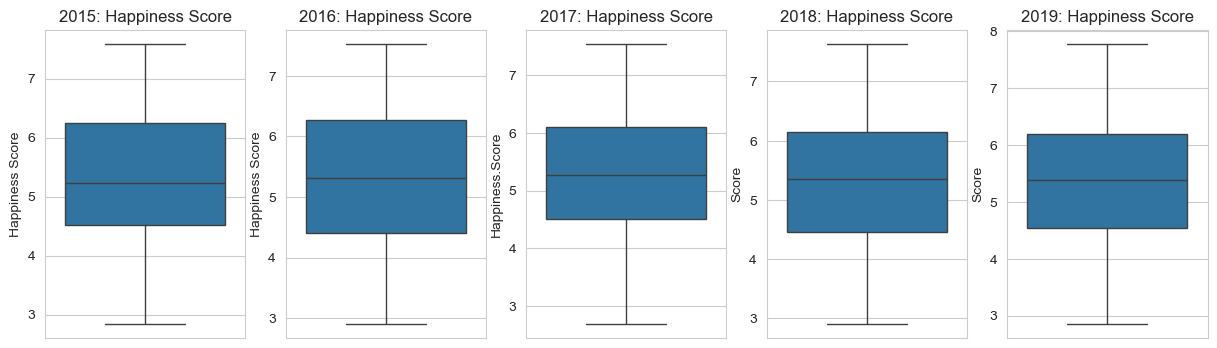

In [134]:
plt.figure(figsize=(15, 4)) 

plt.subplot(1, 5, 1)
sns.boxplot(df_2015_new['Happiness Score'])
plt.title('2015: Happiness Score')

plt.subplot(1, 5, 2)
sns.boxplot(df_2016_new['Happiness Score'])
plt.title('2016: Happiness Score')

plt.subplot(1, 5, 3)
sns.boxplot(df_2017_new['Happiness.Score'])
plt.title('2017: Happiness Score')

plt.subplot(1, 5, 4)
sns.boxplot(df_2018_new['Score'])
plt.title('2018: Happiness Score')

plt.subplot(1, 5, 5)
sns.boxplot(df_2019_new['Score'])
plt.title('2019: Happiness Score')

plt.show()

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

<Figure size 1000x1000 with 0 Axes>

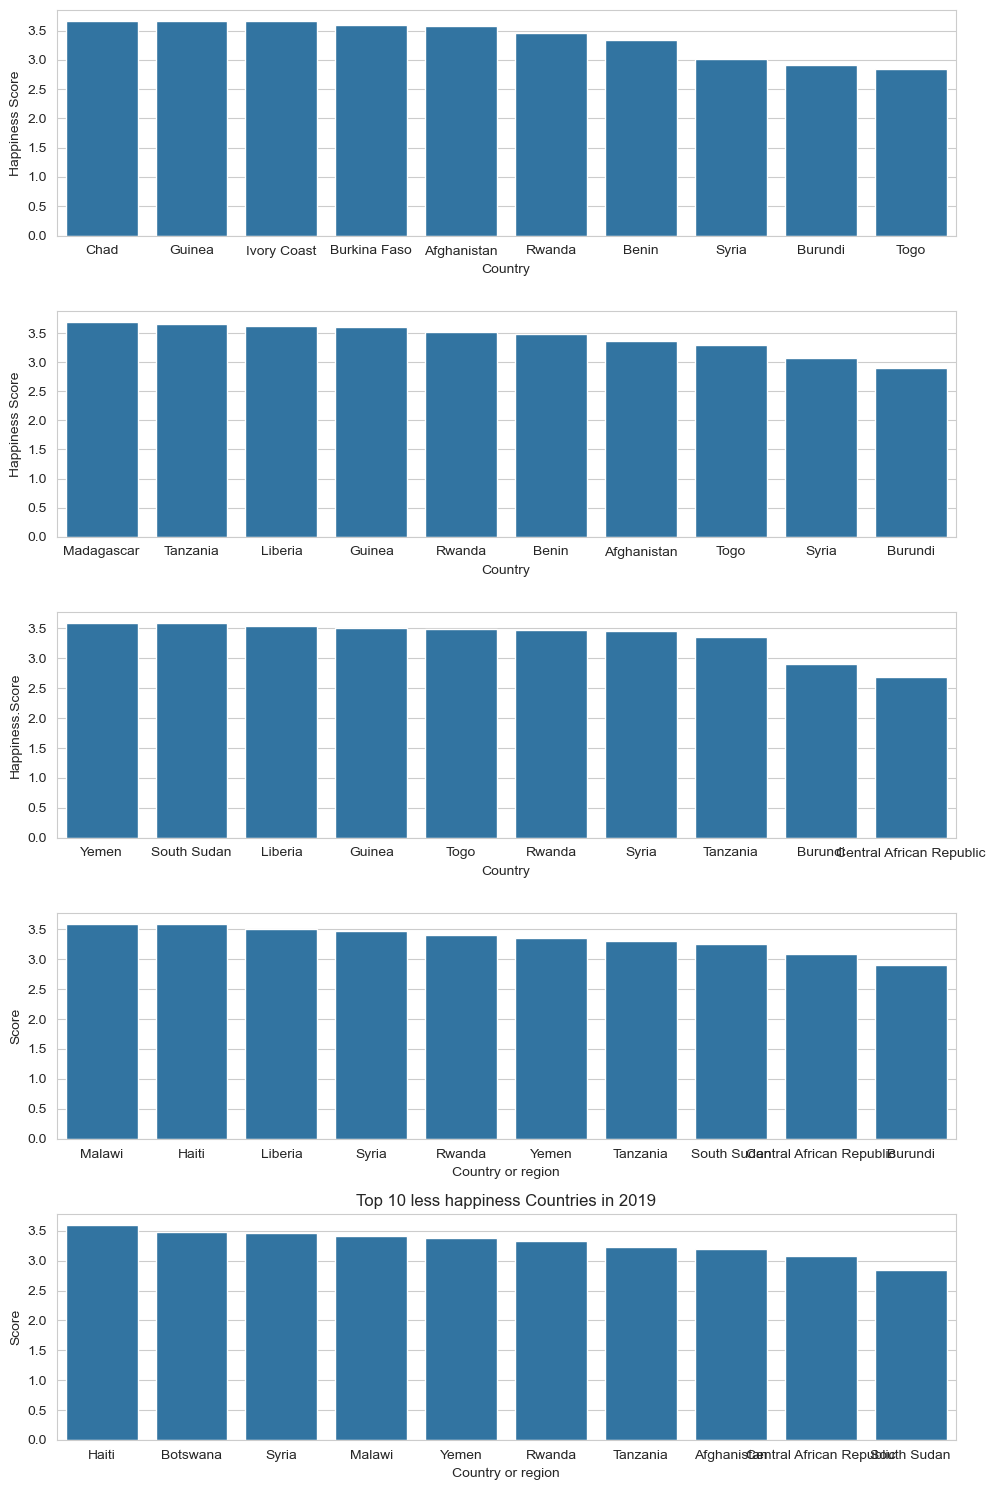

In [135]:
# Bar chart 
plt.figure(figsize=(10, 10)) 

fig, ax = plt.subplots(5, 1, figsize=(10, 15))

less_20_2015 = df_2015_new.sort_values(by='Happiness Score', ascending=False).tail(10)
plt.title('Top 10 less happiness Countries in 2015')
sns.barplot(x='Country', y='Happiness Score', data=less_20_2015, ax=ax[0]) 


less_20_2016 = df_2016_new.sort_values(by='Happiness Score', ascending=False).tail(10)
plt.title('Top 10 less happiness Countries in 2016')
sns.barplot(x='Country', y='Happiness Score', data=less_20_2016, ax=ax[1]) 

less_20_2017 = df_2017_new.sort_values(by='Happiness.Score', ascending=False).tail(10)
plt.title('Top 10 less happiness Countries in 2017')
sns.barplot(x='Country', y='Happiness.Score', data=less_20_2017, ax=ax[2]) 

less_20_2018 = df_2018_new.sort_values(by='Score', ascending=False).tail(10)
plt.title('Top 10 less happiness Countries in 2018')
sns.barplot(x='Country or region', y='Score', data=less_20_2018, ax=ax[3]) 

less_20_2019 = df_2019_new.sort_values(by='Score', ascending=False).tail(10)
plt.title('Top 10 less happiness Countries in 2019')
sns.barplot(x='Country or region', y='Score', data=less_20_2019, ax=ax[4]) 

plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

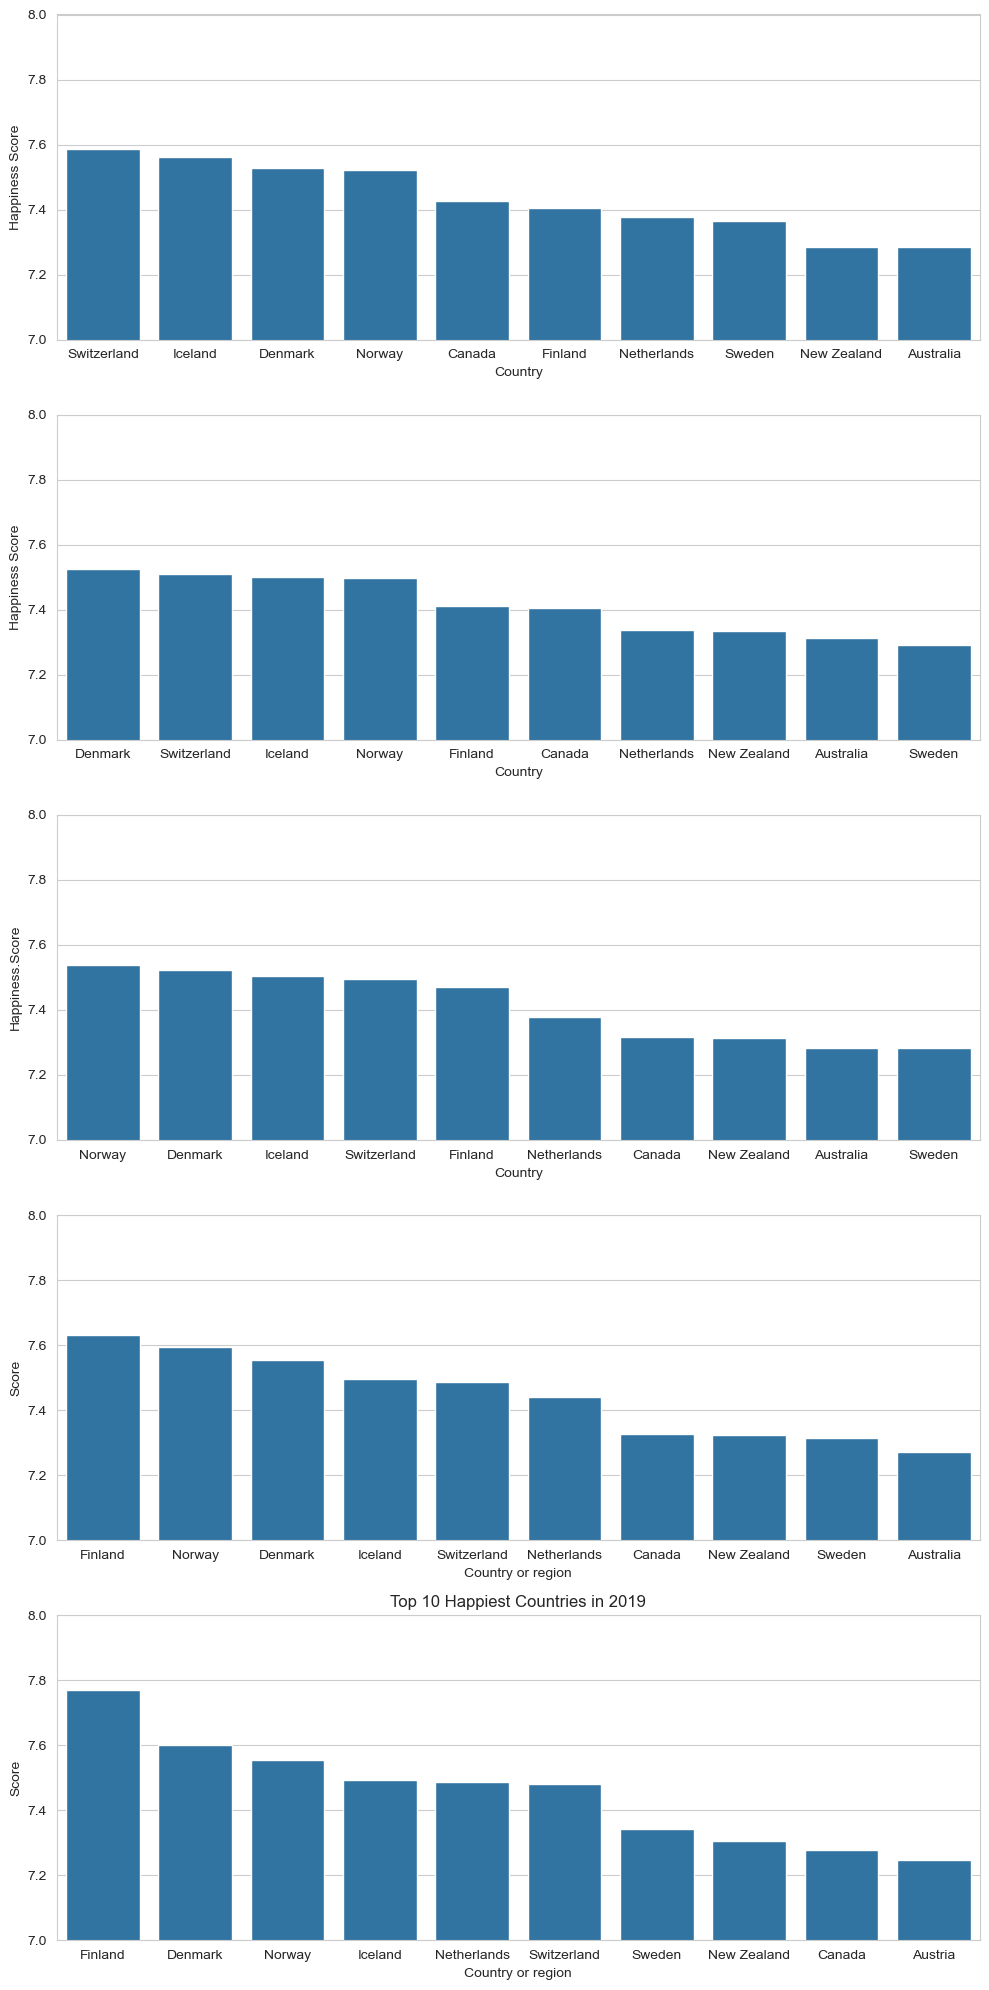

In [136]:
# Bar chart 
plt.figure(figsize=(10, 10)) 

fig, ax = plt.subplots(5, 1, figsize=(10, 20))

top_20_2015 = df_2015_new.sort_values(by='Happiness Score', ascending=False).head(10)
plt.title('Top 10 Happiest Countries in 2015')
sns.barplot(x='Country', y='Happiness Score', data=top_20_2015, ax=ax[0]) 
ax[0].set_ylim([7, 8])

top_20_2016 = df_2016_new.sort_values(by='Happiness Score', ascending=False).head(10)
plt.title('Top 10 Happiest Countries in 2016')
sns.barplot(x='Country', y='Happiness Score', data=top_20_2016, ax=ax[1]) 
ax[1].set_ylim([7, 8])

top_20_2017 = df_2017_new.sort_values(by='Happiness.Score', ascending=False).head(10)
plt.title('Top 10 Happiest Countries in 2017')
sns.barplot(x='Country', y='Happiness.Score', data=top_20_2017, ax=ax[2]) 
ax[2].set_ylim([7, 8])

top_20_2018 = df_2018_new.sort_values(by='Score', ascending=False).head(10)
plt.title('Top 10 Happiest Countries in 2018')
sns.barplot(x='Country or region', y='Score', data=top_20_2018, ax=ax[3]) 
ax[3].set_ylim([7, 8])

top_20_2019 = df_2019_new.sort_values(by='Score', ascending=False).head(10)
plt.title('Top 10 Happiest Countries in 2019')
sns.barplot(x='Country or region', y='Score', data=top_20_2019, ax=ax[4]) 
ax[4].set_ylim([7, 8])

plt.tight_layout()
plt.show()


<Axes: >

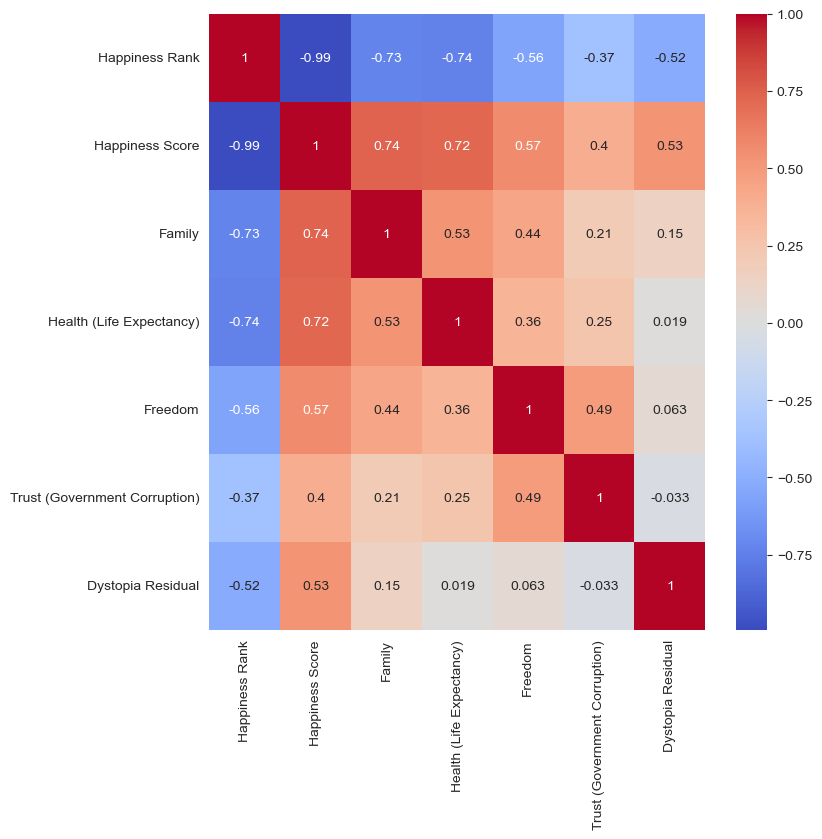

In [137]:
# Show the Each type affecting the happiness score
plt.figure(figsize=(8, 8))
df_2015_new_num = df_2015_new.select_dtypes(include=[np.number])
sns.heatmap(df_2015_new_num.corr(), annot=True, cmap='coolwarm')

<Axes: >

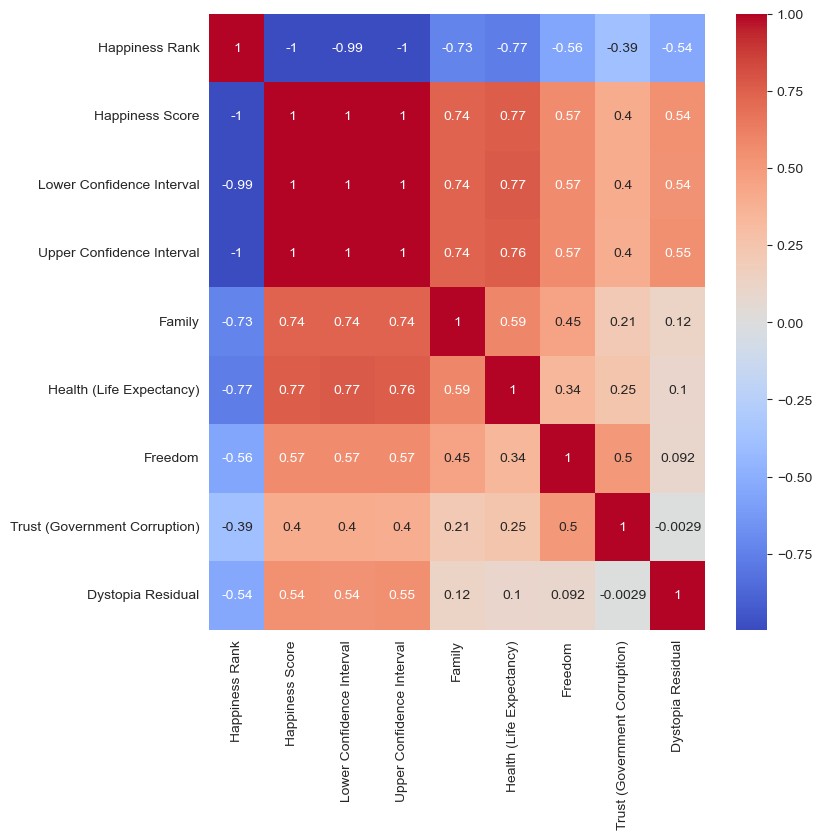

In [138]:
# Show the Each type affecting the happiness score
plt.figure(figsize=(8, 8))
df_2016_new_num = df_2016_new.select_dtypes(include=[np.number]) # Select only numerical columns
sns.heatmap(df_2016_new_num.corr(), annot=True, cmap='coolwarm')

<Axes: >

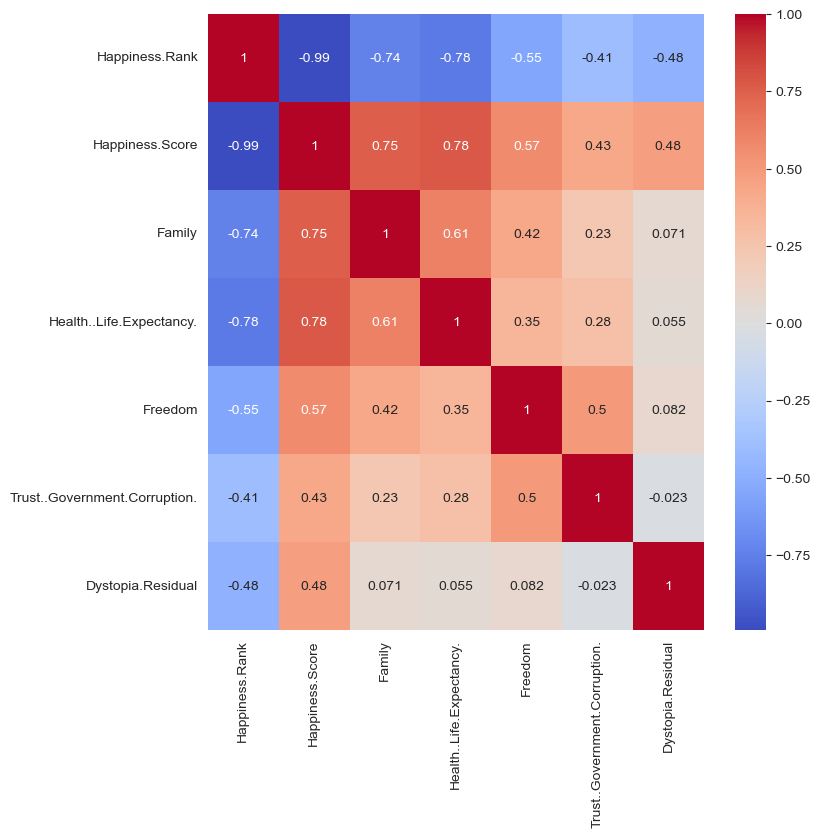

In [139]:
# Show the Each type affecting the happiness score
plt.figure(figsize=(8, 8))
df_2017_new_num = df_2017_new.select_dtypes(include=[np.number]) # Select only numerical columns
sns.heatmap(df_2017_new_num.corr(), annot=True, cmap='coolwarm')

<Axes: >

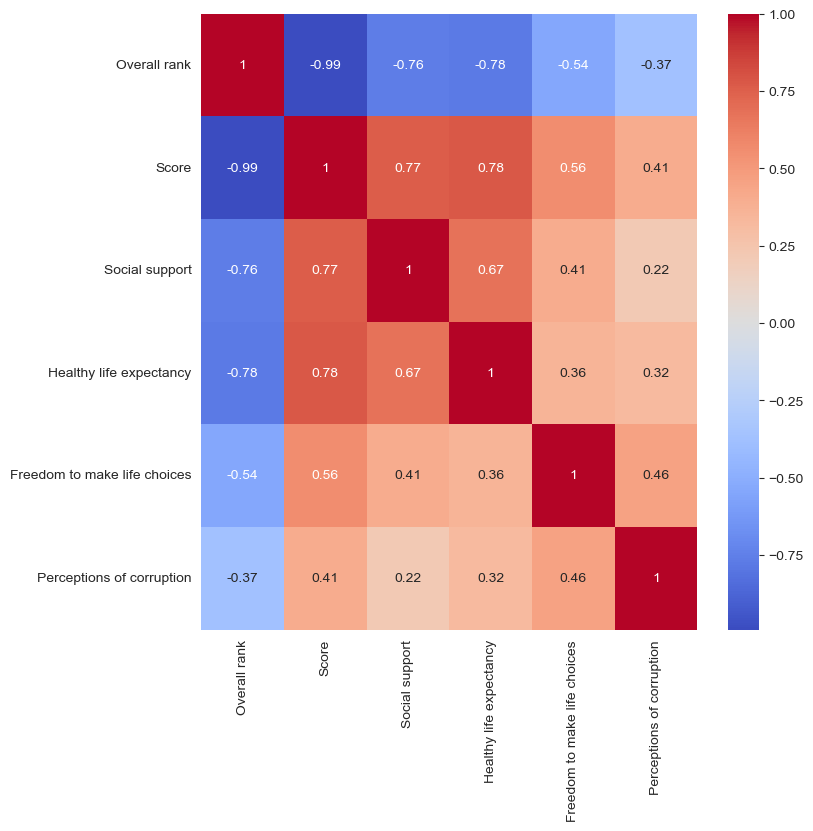

In [140]:
# Show the Each type affecting the happiness score
plt.figure(figsize=(8, 8))
df_2018_new_num = df_2018_new.select_dtypes(include=[np.number]) # Select only numerical columns
sns.heatmap(df_2018_new_num.corr(), annot=True, cmap='coolwarm')

<Axes: >

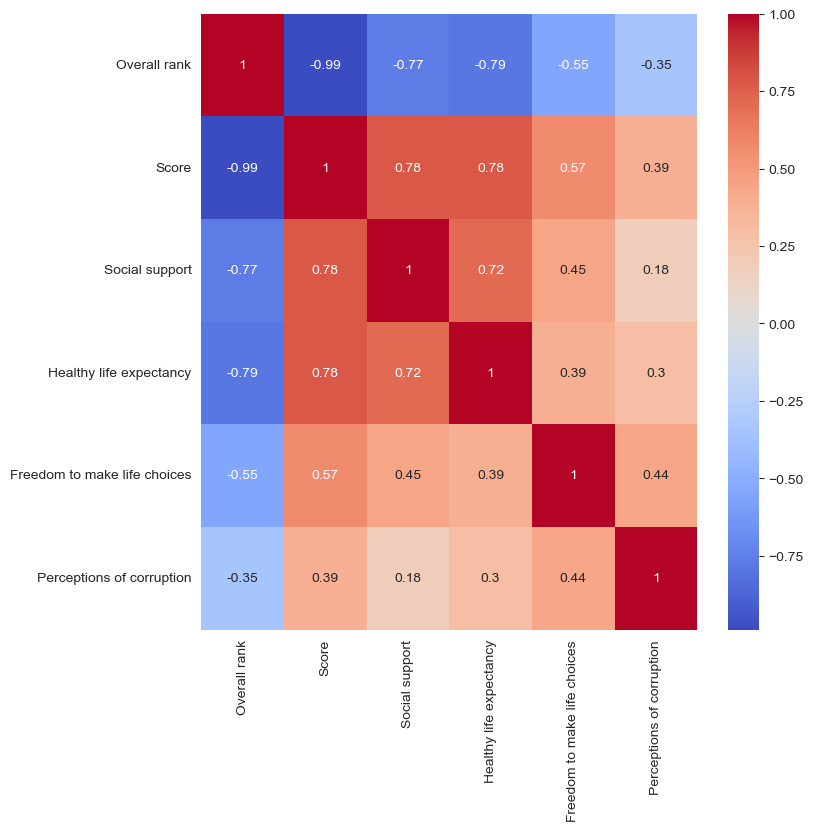

In [141]:
# Show the Each type affecting the happiness score
plt.figure(figsize=(8, 8))
df_2019_new_num = df_2019_new.select_dtypes(include=[np.number]) # Select only numerical columns
sns.heatmap(df_2019_new_num.corr(), annot=True, cmap='coolwarm')

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [142]:
df_2015_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [143]:
df_2016_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,157.0,78.980892,45.466030,1.00000,40.00000,79.00000,118.00000,157.00000
Happiness Score,157.0,5.382185,1.141674,2.90500,4.40400,5.31400,6.26900,7.52600
Lower Confidence Interval,157.0,5.282395,1.148043,2.73200,4.32700,5.23700,6.15400,7.46000
Upper Confidence Interval,157.0,5.481975,1.136493,3.07800,4.46500,5.41900,6.43400,7.66900
Family,157.0,0.793621,0.266706,0.00000,0.64184,0.84142,1.02152,1.18326
Health (Life Expectancy),157.0,0.557619,0.229349,0.00000,0.38291,0.59659,0.72993,0.95277
Freedom,157.0,0.370994,0.145507,0.00000,0.25748,0.39747,0.48453,0.60848
Trust (Government Corruption),157.0,0.137624,0.111038,0.00000,0.06126,0.10547,0.17554,0.50521
Dystopia Residual,157.0,2.325807,0.542220,0.81789,2.03171,2.29074,2.66465,3.83772


In [144]:
df_2017_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness.Rank,155.0,78.000000,44.888751,1.000000,39.500000,78.000000,116.500000,155.000000
Happiness.Score,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
Family,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
Health..Life.Expectancy.,155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
Trust..Government.Corruption.,155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308
Dystopia.Residual,155.0,1.850238,0.500028,0.377914,1.591291,1.832910,2.144654,3.117485


In [145]:
df_2018_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,155.0,78.877419,45.076463,1.000,40.5000,79.000,117.5000,156.000
Score,155.0,5.366897,1.117433,2.905,4.4515,5.358,6.1540,7.632
Social support,155.0,1.216058,0.301286,0.000,1.0755,1.258,1.4640,1.644
Healthy life expectancy,155.0,0.596877,0.248312,0.000,0.4205,0.643,0.7785,1.030
Freedom to make life choices,155.0,0.455606,0.162367,0.000,0.3575,0.493,0.5790,0.724
Perceptions of corruption,155.0,0.112000,0.096492,0.000,0.0510,0.082,0.1370,0.457


In [146]:
df_2019_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

Question 2 & 3:

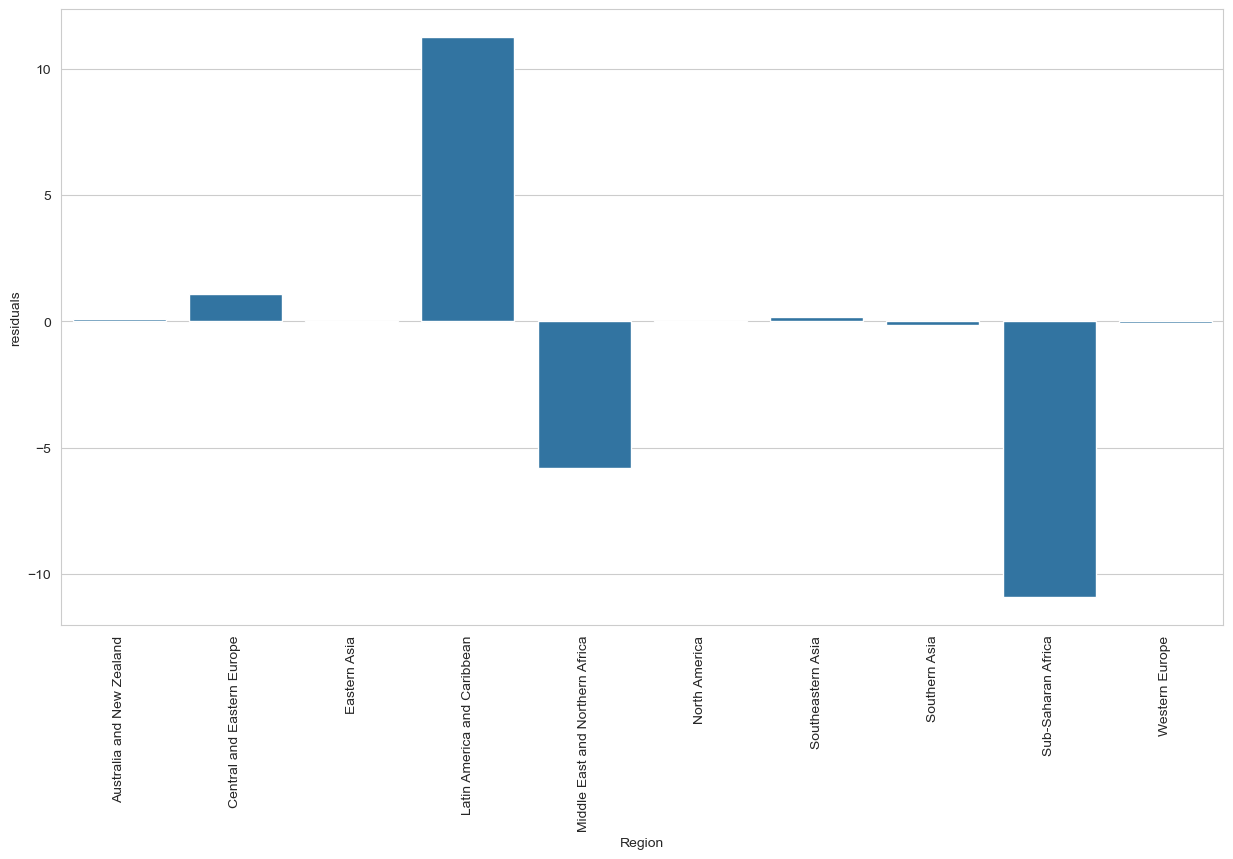

In [147]:
df_2015_sum = df_2015_new.groupby('Region')['Happiness Score'].sum().reset_index()
df_2016_sum = df_2016_new.groupby('Region')['Happiness Score'].sum().reset_index()
df_residuals = pd.DataFrame()
df_residuals['residuals'] = df_2016_sum['Happiness Score'] - df_2015_sum['Happiness Score']
df_residuals['Region'] = df_2015_sum['Region']

plt.figure(figsize=(15, 8))
sns.barplot(x='Region', y='residuals', data=df_residuals)
plt.xticks(rotation=90)
plt.show()

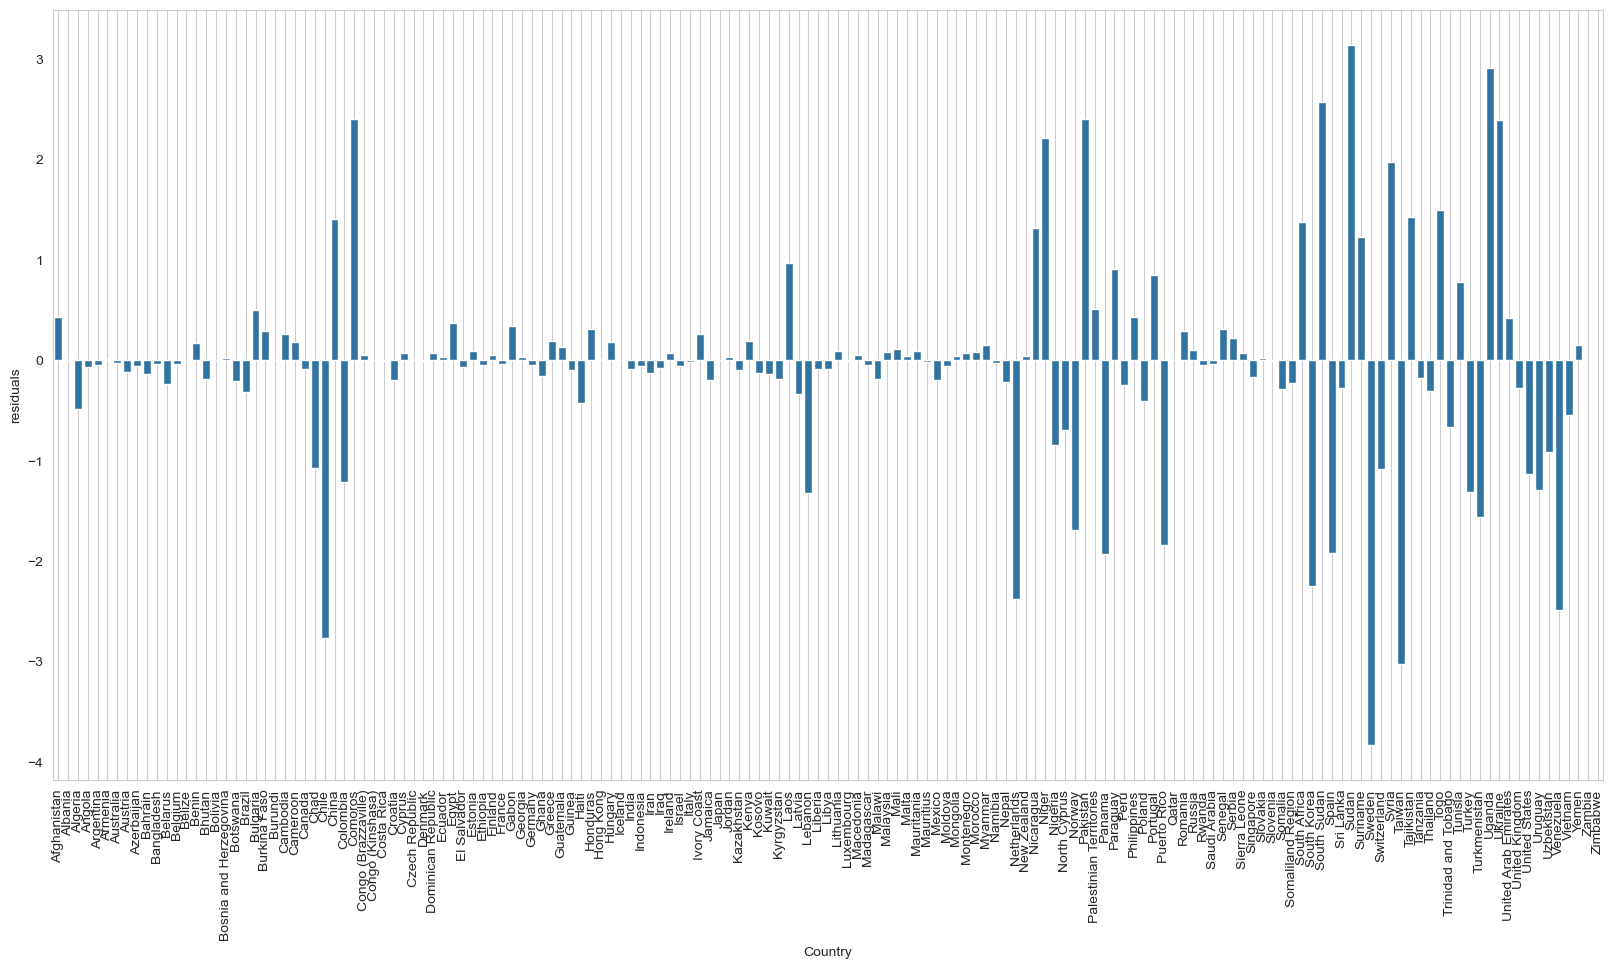

In [148]:
df_2016_sum = df_2016_new.groupby('Country')['Happiness Score'].sum().reset_index()
df_2017_sum = df_2017_new.groupby('Country')['Happiness.Score'].sum().reset_index()

df_residuals = pd.DataFrame()
df_residuals['residuals'] = df_2017_sum['Happiness.Score'] - df_2016_sum['Happiness Score']
df_residuals['Country'] = df_2016_sum['Country']

plt.figure(figsize=(20, 10))
sns.barplot(x='Country', y='residuals', data=df_residuals)
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [149]:
# Sum residual scores for each region in each year
df_2015_sum = df_2015_new.groupby('Country')['Happiness Score'].sum().reset_index()
df_2016_sum = df_2016_new.groupby('Country')['Happiness Score'].sum().reset_index()
df_2017_sum = df_2017_new.groupby('Country')['Happiness.Score'].sum().reset_index()
df_2018_sum = df_2018_new.groupby('Country or region')['Score'].sum().reset_index()
df_2019_sum = df_2019_new.groupby('Country or region')['Score'].sum().reset_index()

df_residuals = pd.DataFrame()
df_residuals['change_2015_2016'] = (df_2016_sum['Happiness Score'] - df_2015_sum['Happiness Score'])
df_residuals['change_2016_2017'] = (df_2017_sum['Happiness.Score'] - df_2016_sum['Happiness Score'])
df_residuals['change_2017_2018'] = (df_2018_sum['Score'] - df_2017_sum['Happiness.Score'])
df_residuals['change_2018_2019'] = (df_2019_sum['Score'] - df_2018_sum['Score'])
# delete nulls 
df_residuals['Country'] = df_2015_sum['Country']
df_residuals = df_residuals.dropna()

df_residuals

,change_2015_2016,change_2016_2017,change_2017_2018,change_2018_2019,Country
0,-0.215,0.434,-1.619999e-01,-0.429,Afghanistan
1,-0.304,-0.011,-5.800005e-02,0.133,Albania
2,0.750,-0.483,-5.770002e-01,-0.084,Algeria
3,-0.167,-0.071,-7.629395e-08,2.291,Angola
4,0.076,-0.051,-2.110000e-01,-1.829,Argentina
...,...,...,...,...,...
150,-0.574,-1.295,-4.440000e-01,1.368,United States
151,-0.498,-0.913,2.900012e-02,-0.396,Uruguay
152,0.081,-2.491,-2.379999e-01,1.820,Uzbekistan
153,-1.749,-0.547,-1.369999e-01,-0.997,Venezuela


In [150]:
print('Significant changes in the happiness score between 2015 and 2016') # 2015 and 2016 increments
df_residuals.sort_values(by='change_2015_2016', ascending=False).head(5)[['Country', 'change_2015_2016']]

Significant changes in the happiness score between 2015 and 2016


,Country,change_2015_2016
25,Central African Republic,3.726
136,Syria,3.373
141,Togo,3.329
97,Myanmar,3.032
44,Ethiopia,2.901


In [151]:
print('Significant changes in the happiness score between 2016 and 2017') # 2016 and 2017 increments
df_residuals.sort_values(by='change_2016_2017', ascending=False).head(5)[['Country', 'change_2016_2017']]

Significant changes in the happiness score between 2016 and 2017


,Country,change_2016_2017
131,Sudan,3.145
145,Turkmenistan,2.909
128,South Korea,2.571
104,North Cyprus,2.405
30,Comoros,2.401


In [152]:
print('Significant changes in the happiness score between 2017 and 2018') # 2017 and 2018 increments
df_residuals.sort_values(by='change_2017_2018', ascending=False).head(5)[['Country', 'change_2017_2018']]

Significant changes in the happiness score between 2017 and 2018


,Country,change_2017_2018
133,Swaziland,4.025
138,Tajikistan,2.577
116,Romania,2.339
87,Mali,2.335
105,Norway,2.325


In [153]:
print('Significant changes in the happiness score between 2018 and 2019') # 2018 and 2019 increments
df_residuals.sort_values(by='change_2018_2019', ascending=False).head(5)[['Country', 'change_2018_2019']]

Significant changes in the happiness score between 2018 and 2019


,Country,change_2018_2019
43,Estonia,3.419
26,Chad,3.361
32,Congo (Kinshasa),2.922
5,Armenia,2.907
23,Cameroon,2.845


In [154]:
print('Significant changes in the happiness score between 2015 and 2016') # 2015 and 2016 decrements
df_residuals.sort_values(by='change_2015_2016', ascending=False).tail(5)[['Country', 'change_2015_2016']]

Significant changes in the happiness score between 2015 and 2016


,Country,change_2015_2016
140,Thailand,-3.152
58,Iceland,-3.157
82,Luxembourg,-3.251
100,New Zealand,-3.430
135,Switzerland,-4.518


In [155]:
print('Significant changes in the happiness score between 2016 and 2017') # 2016 and 2017 decrements
df_residuals.sort_values(by='change_2016_2017', ascending=False).tail(5)[['Country', 'change_2016_2017']]

Significant changes in the happiness score between 2016 and 2017


,Country,change_2016_2017
97,Myanmar,-2.377
152,Uzbekistan,-2.491
27,Chile,-2.769
136,Syria,-3.030
133,Swaziland,-3.829


In [156]:
print('Significant changes in the happiness score between 2017 and 2018') # 2017 and 2018 decrements
df_residuals.sort_values(by='change_2017_2018', ascending=False).tail(5)[['Country', 'change_2017_2018']]

Significant changes in the happiness score between 2017 and 2018


,Country,change_2017_2018
117,Russia,-2.936
134,Sweden,-2.960
137,Taiwan,-3.121
131,Sudan,-3.145
128,South Korea,-3.149


In [157]:
print('Significant changes in the happiness score between 2018 and 2019') # 2018 and 2019 increments
df_residuals.sort_values(by='change_2018_2019', ascending=False).tail(5)[['Country', 'change_2018_2019']]

Significant changes in the happiness score between 2018 and 2019


,Country,change_2018_2019
12,Belgium,-2.044
37,Denmark,-2.130
87,Mali,-2.137
16,Bosnia and Herzegovina,-2.264
25,Central African Republic,-2.978


<Figure size 1000x1000 with 0 Axes>

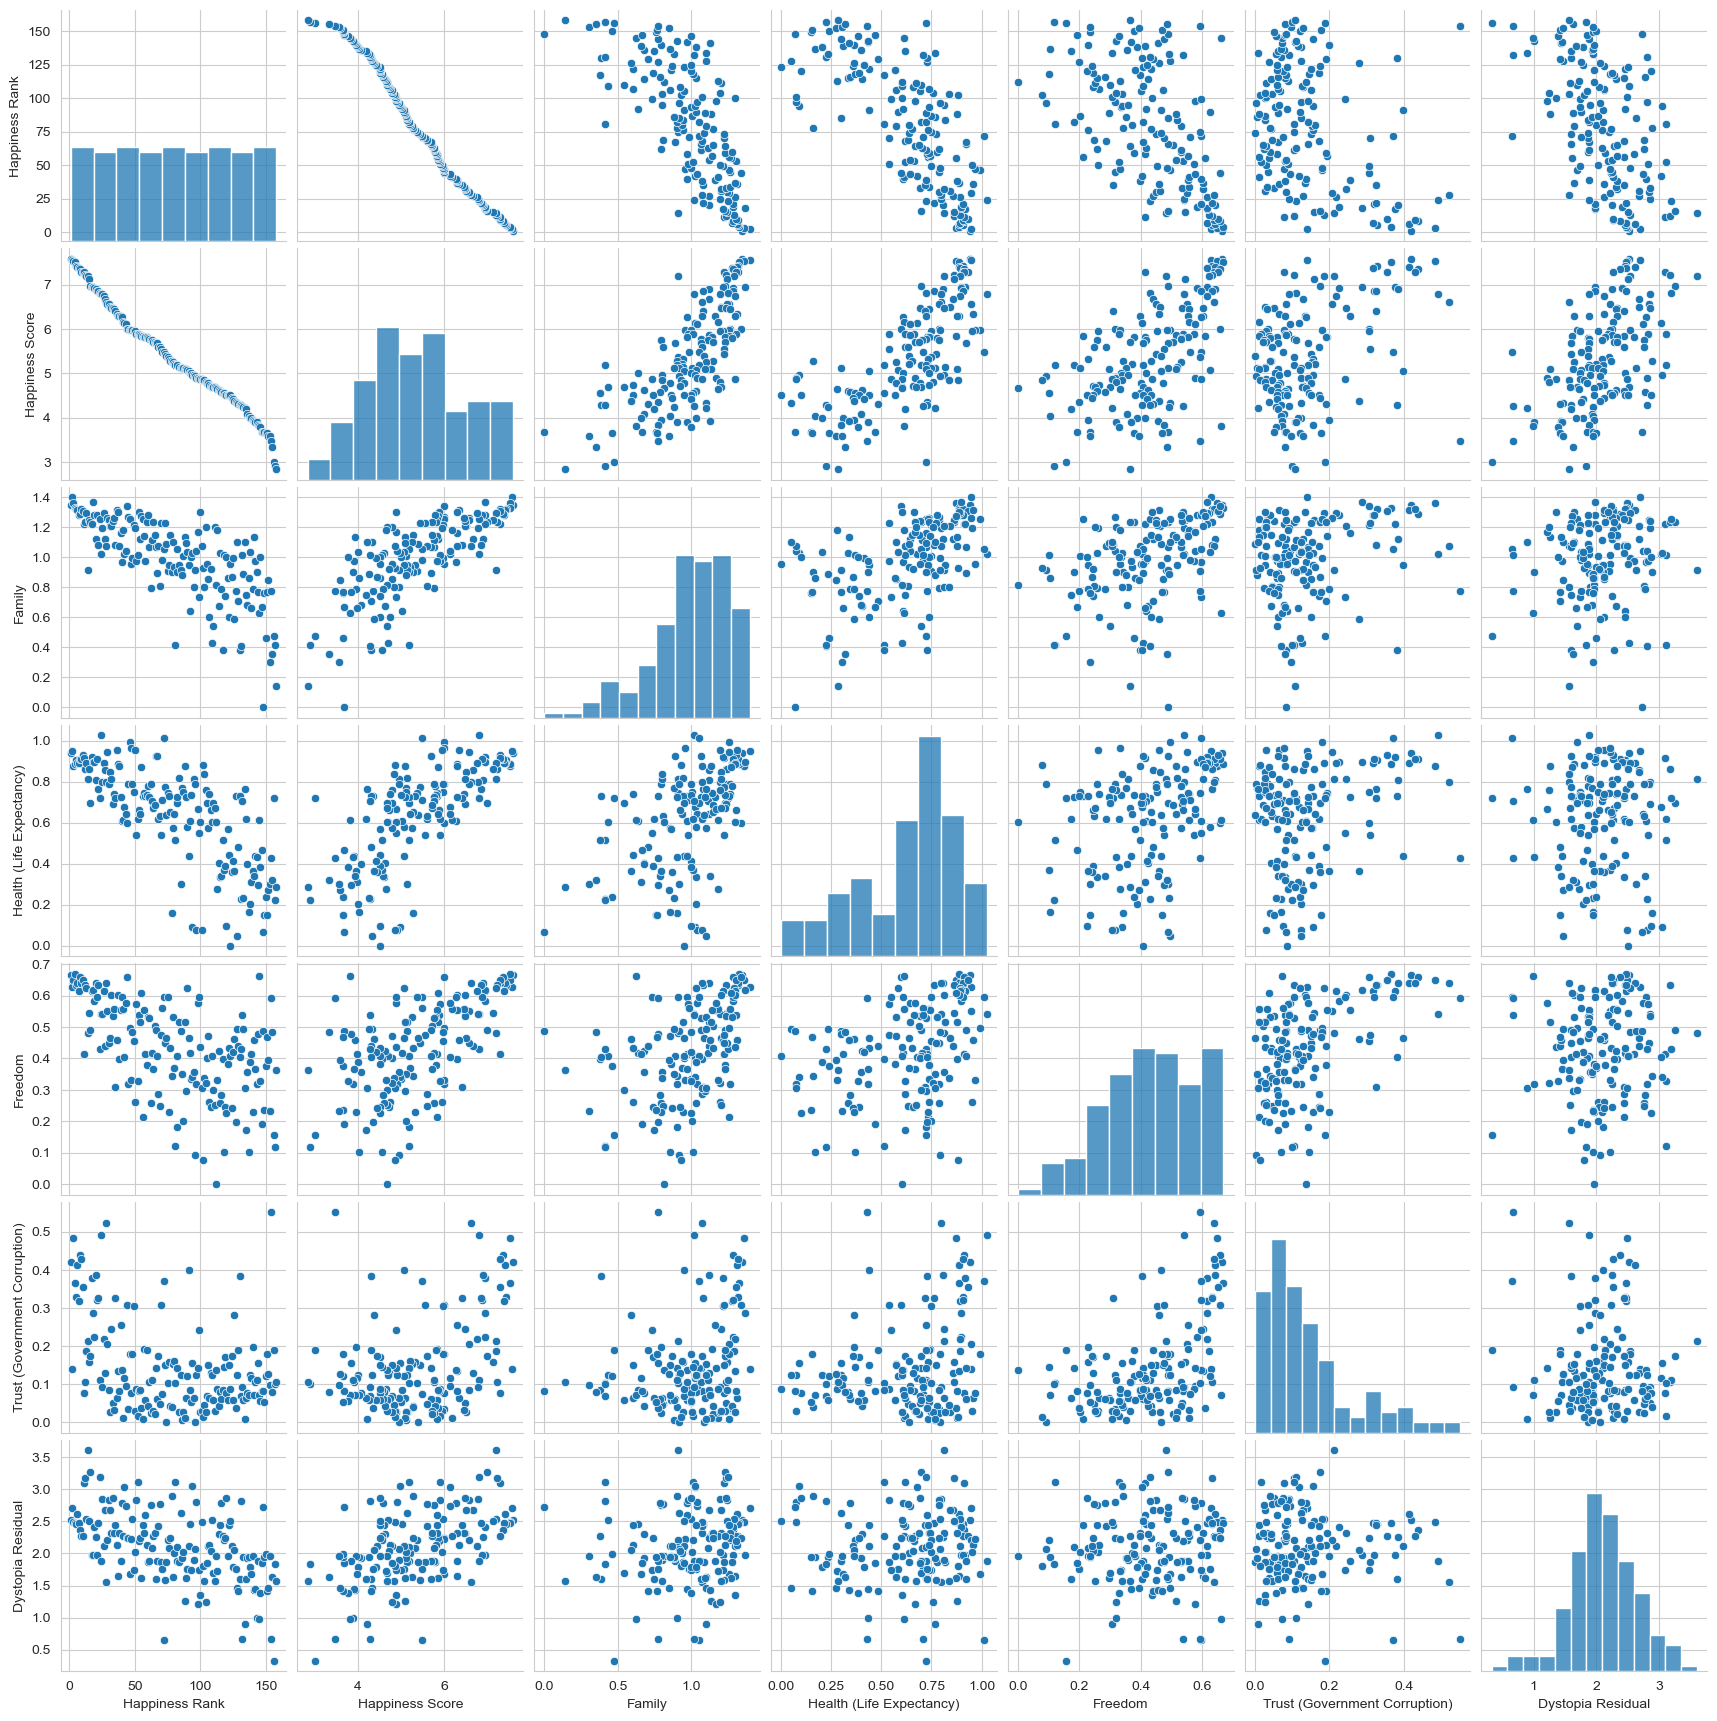

In [158]:
# Pairplot
plt.figure(figsize=(10, 10))
sns.pairplot(df_2015_new)

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.